<div style="width: 100%; clear: both;">
  <div style="float: left; width: 50%;">
    <img src="https://www.ucc.edu.co/institucional/acerca-de-la-universidad/Documents/logo_ucc_2018(CURVAS)-01.png" align="left" style="max-width: 100%; height: auto;">
  </div>
  <div style="float: right; width: 50%;">
    <p style="margin: 0; padding-top: 22px; text-align:right;"><strong>Laboratorio de Tecnologías Emergentes</strong></p>
    <p style="margin: 0; text-align:right;">Universidad Cooperativa de Colombia, Campus Ibagué-Espinal</p>
    <p style="margin: 0; text-align:right; padding-bottom:;">Facultad de Ingeniería</p>
    <p style="margin: 0; text-align:right; padding-bottom: 100px;">Programa de Ingeniería de Sistemas</p>
  </div>
</div>
<div style="width:100%;">&nbsp;</div>

<h1 align=center><font size=5>Herramientas computacionales para la</font></h1>

# 📘 Introducción
En este cuaderno se desarrollará el proceso completo de modelado supervisado mediante la técnica de Redes Neuronales Convolucionales, aplicado a un problema de clasificación multiclase. Este enfoque se selecciona por su capacidad para manejar detección de objetos en imágenes, su robustez ante sobreajuste y su utilidad en el análisis de la importancia de variables. El ejercicio forma parte del desarrollo de competencias en ciencia de datos, aprendizaje automático y análisis de desempeño de modelos, dentro del contexto de la Ingeniería de Sistemas.


# 🎯 Objetivo General

Diseñar, entrenar y validar un modelo de clasificación multiclase utilizando la técnica de Redes neuronales convolucionales, implementando un flujo de trabajo reproducible que incluya exploración de datos, preprocesamiento, evaluación cruzada, ajuste de hiperparámetros e interpretación de resultados, con el fin de fortalecer la comprensión crítica y técnica de los estudiantes en torno a la validación de modelos predictivos.

# 🧪 Metodología

El ejercicio se desarrollará en siete etapas:
1. Exploración inicial del conjunto de datos, preprocesamiento y análisis descriptivo.
2. Entrenamiento de un modelo base.
3. Evaluación del modelo base: métricas, y reporte de clasificación.
4. Optimización mediante búsqueda en malla (GridSearchCV).
5. Interpretación y análisis de importancia de características.

Librerías: `numpy`, `tensorflow`, `matplotlib`, `sklearn`, `PIL`.

# 📂 1. Carga, preprocesamiento y comprensión del conjunto de datos

In [2]:
import os
import shutil
import random
#Cargar categorias y dividir el dataset
trainSplit = .7 #Se divirá en 70% para entrenamiento y 30% para validación
validateSplit = .25
categories = []
source = "./Insectos/"
folders = os.listdir(source)

if ".DS_Store" in folders:
    os.remove(f"{source}/.DS_store") #Eliminar carpeta basura

for subfolder in folders:
    if os.path.isdir(source + subfolder):
        categories.append(subfolder) #Cada carpeta adentro de ./Insectos será una categoría en el modelo

categories.sort()

print("Categorias encontradas: ", categories)

#Crear carpeta destino
target_folder = "./dataset" #Donde se creará el dataset dividido
existDatasetPath = os.path.exists(target_folder)
if not existDatasetPath:
    os.mkdir(target_folder)

#Dividir entrenamiento y validación
def split_data(SOURCE, TRAINING, VALIDATE, TEST, TRAIN_SPLIT_SIZE, VALIDATE_SPLIT_SIZE):
    files = []

    for filename in os.listdir(SOURCE):
        file = SOURCE + "/" +filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is empty")
    print("Cantidad total de imágenes:", len(files))

    #Calcula las imágenes de entrenamiento y validación usando los porcentajes recibidos
    trainingLength = round(len(files) * TRAIN_SPLIT_SIZE)
    validateLength = round(len(files) * VALIDATE_SPLIT_SIZE)
    
    #Randomiza orden de los archivos
    shuffleSet = random.sample(files, len(files)) 
    
    #Separa los archivos desde el primero hasta que consiga la cantidad de entrenamiento necesaria
    trainingSet = shuffleSet[0 : trainingLength]
    
    #Separa los archivos desde donde acaban los de entrenamiento hasta que consiga la cantidad necesaria de validación
    validateSet = shuffleSet[trainingLength : trainingLength + validateLength] 
    
    #Deja el resto de imagenes para tests
    testSet = shuffleSet[trainingLength + validateLength:]
    
    #Copiar imagenes de entrenamiento
    for filename in trainingSet:
         thisFile = SOURCE + filename
         destination = TRAINING + filename
         shutil.copyfile(thisFile, destination)
    
    #Copiar imagenes de validación
    for filename in validateSet:
        thisFile = SOURCE + filename
        destination = VALIDATE + filename
        shutil.copyfile(thisFile, destination)
        
    #Copiar imagenes de test
    for filename in testSet:
        thisFile = SOURCE + filename
        destination = TEST + filename
        shutil.copyfile(thisFile, destination)
        
    print("Imágenes de validación:", len(validateSet))
    print("Imágenes de entrenamiento:", len(trainingSet))
    print("Imágenes de prueba:", len(testSet))
    
    #Retorna cuantas imágenes de entrenamiento y validación quedaron en cada categoríaÏ
    return [len(validateSet), len(trainingSet), len(testSet)]

#Crear carpetas de destino de entrenamiento y validación
trainPath = target_folder + "/train"
existTrainPath = os.path.exists(trainPath)
if not existTrainPath:
    os.mkdir(trainPath)

validatePath = target_folder + "/validate"
existValidatePath = os.path.exists(validatePath)
if not existValidatePath:
    os.mkdir(validatePath)

testPath = target_folder + "/test"
existTestPath = os.path.exists(testPath)
if not existTestPath:
    os.mkdir(testPath)

#Cantidades de imágenes de entrenamiento y validación por categoria
categoriesTrain = []
categoriesValidate = []
categoriesTest = []

for category in categories: # Por cada categoría encontrada dividir las imágenes dentro de la carpeta
    trainDestPath = trainPath + "/" + category
    if not os.path.exists(trainDestPath):
        os.mkdir(trainDestPath)

    validateDestPath = validatePath + "/" + category
    if not os.path.exists(validateDestPath):
        os.mkdir(validateDestPath)
        
    testDestPath = testPath + "/" + category
    if not os.path.exists(testDestPath):
        os.mkdir(testDestPath)

    sourcePath = source + category + "/"
    trainDestPath = trainDestPath + "/"
    validateDestPath = validateDestPath + "/"
    testDestPath = testDestPath + "/"
    print()
    print(category)
    print("---------------------------------------------")
    [validate, train, test] = split_data(sourcePath, trainDestPath, validateDestPath, testDestPath, trainSplit, validateSplit)
    print("---------------------------------------------")
    categoriesTrain.append(train)
    categoriesTest.append(test)
    categoriesValidate.append(validate)

Categorias encontradas:  ['cyclocephala_lunulata', 'dysdercus_concinnus', 'leptinotarsa_decemlineata']

cyclocephala_lunulata
---------------------------------------------
Cantidad total de imágenes: 157
Imágenes de validación: 39
Imágenes de entrenamiento: 110
Imágenes de prueba: 8
---------------------------------------------

dysdercus_concinnus
---------------------------------------------
Cantidad total de imágenes: 167
Imágenes de validación: 42
Imágenes de entrenamiento: 117
Imágenes de prueba: 8
---------------------------------------------

leptinotarsa_decemlineata
---------------------------------------------
Cantidad total de imágenes: 205
Imágenes de validación: 51
Imágenes de entrenamiento: 144
Imágenes de prueba: 10
---------------------------------------------


# 🔍 2. Análisis exploratorio de datos (EDA)

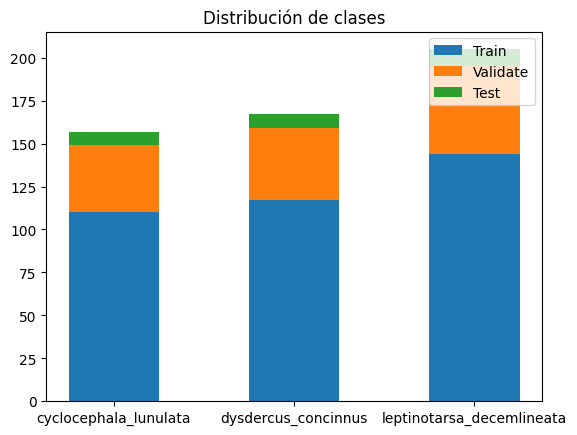

In [3]:
import numpy as np
import matplotlib.pyplot as plt
weight_counts = {
    "Train": np.array(categoriesTrain),
    "Validate": np.array(categoriesValidate),
    "Test": np.array(categoriesTest),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(categories, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Distribución de clases")
ax.legend(loc="upper right")
plt.show()


# 🧠 3. Entrenamiento y evaluación del modelo base

Found 371 images belonging to 3 classes.
Found 132 images belonging to 3 classes.
Epoch 1/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - accuracy: 0.6031 - loss: 0.8218 - val_accuracy: 0.9015 - val_loss: 0.1965
Epoch 2/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.8555 - loss: 0.2734 - val_accuracy: 0.8864 - val_loss: 0.1898
Epoch 3/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.9458 - loss: 0.1495 - val_accuracy: 0.8864 - val_loss: 0.2637
Epoch 4/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.8896 - loss: 0.2518 - val_accuracy: 0.8636 - val_loss: 0.2972
Epoch 5/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.9313 - loss: 0.1454 - val_accuracy: 0.8939 - val_loss: 0.2135
Epoch 6/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.8602 - loss: 0.2664 - val_accuracy: 0.9015 - val_loss: 0.2170
Epoch 7/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.8883 - loss: 0.2237 - val_accuracy: 0.9318 - val_loss: 0.2243
Epoch 8/8
12/12 ━━━━━━━━━━━━━━━━━━━━ 27s 2s

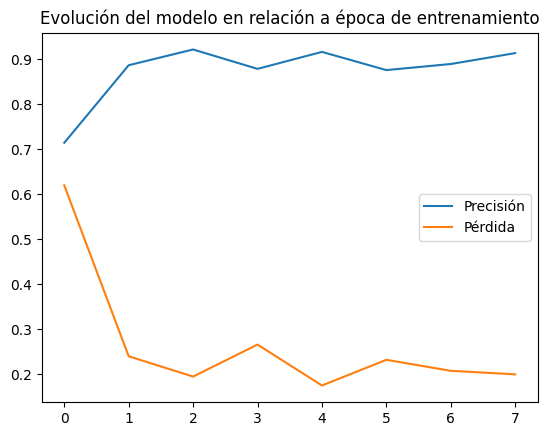

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

trainPath = "./dataset/train"
validatePath = "./dataset/validate"

#Generate more images
trainGenerator = ImageDataGenerator(rotation_range=15, width_shift_range=0.4, height_shift_range=0.1, brightness_range=(0,0.2)).flow_from_directory(trainPath, target_size=(320,320), batch_size=32)
testGenerator = ImageDataGenerator(rotation_range=15, width_shift_range=0.4, height_shift_range=0.1, brightness_range=(0,0.2)).flow_from_directory(validatePath, target_size=(320,320), batch_size=32)

#Build model

baseModel = EfficientNetB0(weights="imagenet", include_top=False)
x= baseModel.output
x= GlobalAveragePooling2D()(x) #1
x= Dense(512, activation="relu")(x) #2
x= Dense(256, activation="relu")(x) #3
x= Dense(128, activation="relu")(x) #4

predictionLayer = Dense(len(categories), activation="softmax")(x) #5

model = Model(inputs=baseModel.input, outputs=predictionLayer)

#Congelar todas las capas del modelo menos las 5 añadidas por nosotros
#Deja fijos los pesos de MobileNetV3 pero permite modificar los pesos de las capas que creamos
for layer in model.layers[:-5]:
    layer.trainable = False

#Compilar modelo
optimizer = Adam(learning_rate = 0.001)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

#Entrenar modelo
modelTrainData = model.fit(trainGenerator, validation_data=testGenerator, epochs=8)

#Guardar modelo
saveModelPath = "/Users/santi/OneDrive/Desktop/UNIVERSIDAD/Semillero/Proyecto/ModelEfficientNetB0.keras"
model.save(saveModelPath)

plt.figure()
plt.plot(modelTrainData.history['accuracy'], label="Precisión")
plt.plot(modelTrainData.history['loss'], label="Pérdida")
plt.title("Evolución del modelo en relación a época de entrenamiento")
plt.legend()
plt.show()

# 🔁 4. Validación del modelo y predicciones

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.8594 - loss: 0.2524


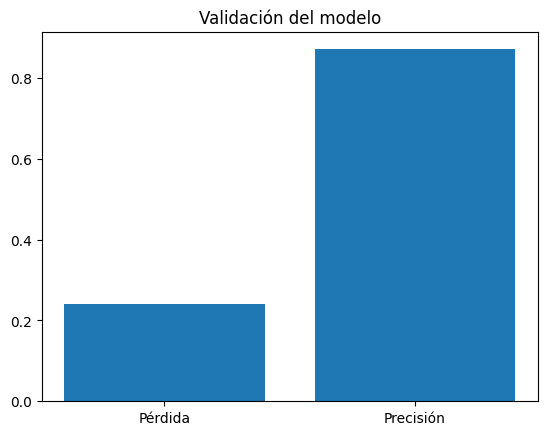

In [7]:
# Evaluate the model on the test data using `evaluate`
from keras.models import load_model
saveModelPath = "/Users/santi/OneDrive/Desktop/UNIVERSIDAD/Semillero/Proyecto/ModelEfficientNetB0.keras"
model = load_model(saveModelPath, custom_objects=None, compile=True, safe_mode=True)


results = model.evaluate(testGenerator, batch_size=1)
plt.figure()
plt.bar(["Pérdida", "Precisión"], results)
#plt.bar(results, label="Precisión")
plt.title("Validación del modelo")
plt.show()

In [49]:
# from PIL import Image
# from tensorflow.keras.preprocessing import image
# import numpy as np
# import cv2

# #Predict Image
# def classify_image(IMG_PATH):
#     x=[]
#     #Cargar la imágen
#     img = Image.open(IMG_PATH) 
#     img.load()
#     img = img.resize((320,320), Image.LANCZOS)
    
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     pred = model.predict(x)
#     return pred[0]

# #Imágenes a predecir
# img_paths = [
#     "./Insectos/melanis_electron/_8060558-melanissmithiaesmith-spixie-melanispixe4406.jpg",
#     "./Insectos/heliconius_doris/Heliconius_doris_03.jpg",
#     "./Insectos/anartia_amathea/Anartia amathea roeselia_mariposa174_NaturalezaMisiones.jpg",
#     "./Insectos/heliconius_doris/Heleconius-doris-Yellow-form-TS-Peru_001-scaled-600x600.jpg",
#     "./Insectos/anartia_amathea/Anartia_amathea_(5).jpg",
#     "./Insectos/melanis_electron/50567919412_96679cea6a_b.jpg",
# ]

# predictions = []
# for path in img_paths:
#     print(path)
#     predictions.append(classify_image(path)) #Guardar el resultado de la predicción de cada imágen para gráficarlo

# fig,axs = plt.subplots(len(predictions), 2, figsize=(10, 10), gridspec_kw={'width_ratios': [2, 1]})

# plotIndex = 1
# for i, pred in enumerate(predictions):
#     plt.subplot(len(predictions), 2, plotIndex)
#     plt.bar(categories, pred, color=['red', 'green', 'blue'])

#     plt.subplot(len(predictions), 2, plotIndex+1)
#     img = plt.imread(img_paths[i])
#     plt.imshow(img)
#     plotIndex += 2

# fig.tight_layout()
# plt.show()

# 🔧 5. Matríz de confusión

Found 26 images belonging to 3 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000         8
           1     1.0000    1.0000    1.0000         8
           2     1.0000    1.0000    1.0000        10

    accuracy                         1.0000        26
   macro avg     1.0000    1.0000    1.0000        26
weighted avg     1.0000    1.0000    1.0000        26



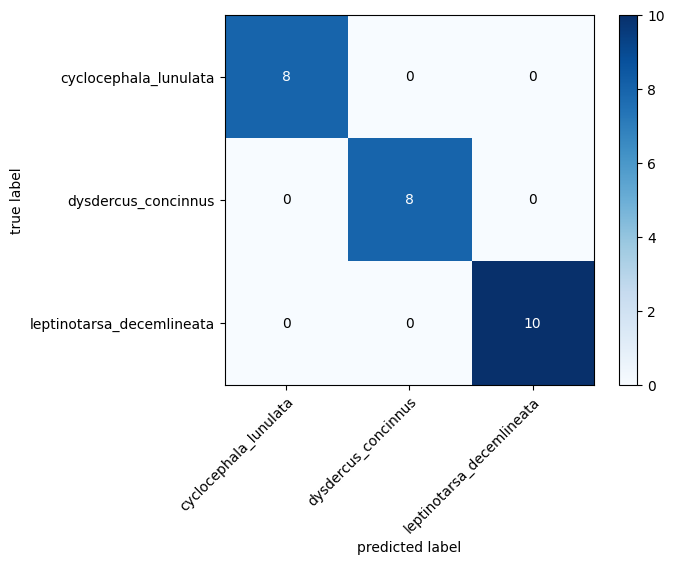

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


modelPath = "/Users/santi/OneDrive/Desktop/UNIVERSIDAD/Semillero/Proyecto/ModelEfficientNetB0.keras"

names = ['cyclocephala_lunulata', 'dysdercus_concinnus','leptinotarsa_decemlineata'] 
 
testPath = './dataset/test'

imageGenerator = ImageDataGenerator(rotation_range=15, width_shift_range=0.4, height_shift_range=0.1, brightness_range=(0,0.2))

 
testGenerator = imageGenerator.flow_from_directory(
    testPath,
    target_size=(320,320),
    batch_size = 32,
    class_mode='categorical',
    shuffle=False)
 
loadedModel= load_model(modelPath)
 
predictions = loadedModel.predict(testGenerator)
 
yPred = np.argmax(predictions, axis=1)
yReal = testGenerator.classes

matc = confusion_matrix(yReal, yPred)
 
 
 
print(metrics.classification_report(yReal, yPred, digits = 4))

fig, ax = plot_confusion_matrix(conf_mat=matc,
                                colorbar=True,
                                #show_absolute=False,
                                #show_normed=True,
                                class_names=names)
plt.show()

# 🧮 6. Reentrenamiento y evaluación final

In [7]:
#modelo_final = grid.best_estimator_
#modelo_final.fit(X_train_scaled, y_train)
#y_pred_final = modelo_final.predict(X_test_scaled)

#print("Reporte Final:\n", classification_report(y_test, y_pred_final))

# 📊 8. Interpretación de resultados

In [8]:
#importances = modelo_final.feature_importances_
#features = pd.Series(importances, index=X.columns).sort_values(ascending=False)

#sns.barplot(x=features.values, y=features.index)
#plt.title("Importancia de Características")
#plt.show()

# 📈 Resultados

- La exactitud del modelo base y el modelo optimizado.
- Comparación entre métricas antes y después del ajuste.
- Visualización de la importancia de características.
- Análisis de la estabilidad del modelo mediante validación cruzada.

# 🧾 Conclusión

El modelo de Redes Neuronales Convolucionales optimizado ha mostrado una mejora sustancial en la precisión en comparación con el modelo base, demostrando la importancia del ajuste de hiperparámetros y la validación cruzada en la creación de modelos robustos. Se identificaron variables críticas que influyen significativamente en la predicción, lo cual puede orientar futuros procesos de ingeniería de características o toma de decisiones automatizada. Este ejercicio fortalece la competencia en análisis predictivo y modelado supervisado con un enfoque reproducible y riguroso, útil para la toma de decisiones basada en datos en entornos reales.

# 📌 Referencias

- Hastie, Tibshirani, & Friedman (2009). *The Elements of Statistical Learning*.
- Géron, A. (2019). *Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow*.
- Documentación oficial de scikit-learn: https://scikit-learn.org